# EcoFOCIpy ADCP QC - 24BSP-4A

- mostly remove >500 cm/s flows in u/v


In [20]:
import xarray as xa
import numpy as np

import matplotlib.pyplot as plt

from EcoFOCIpy.plots import TimeSeriesStickPlot

In [21]:
xdf = xa.load_dataset('24ckp12a_0043m.trimmed.nc')

In [22]:
len(xdf.depth)

20

/Users/bell/src/ecofocipy/src/EcoFOCIpy/plots/TimeSeriesStickPlot.py:119: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), visible=True)
/Users/bell/src/ecofocipy/src/EcoFOCIpy/plots/TimeSeriesStickPlot.py:119: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), visible=True)
/Users/bell/src/ecofocipy/src/EcoFOCIpy/plots/TimeSeriesStickPlot.py:119: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), visible=True)
/Users/bell/src/ecofocipy/src/EcoFOCIpy/plots/TimeSeriesStickPlot.py:119: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xtick

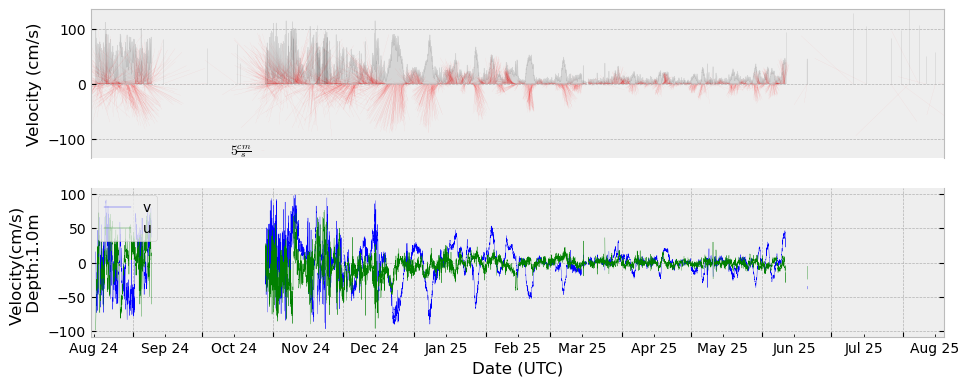

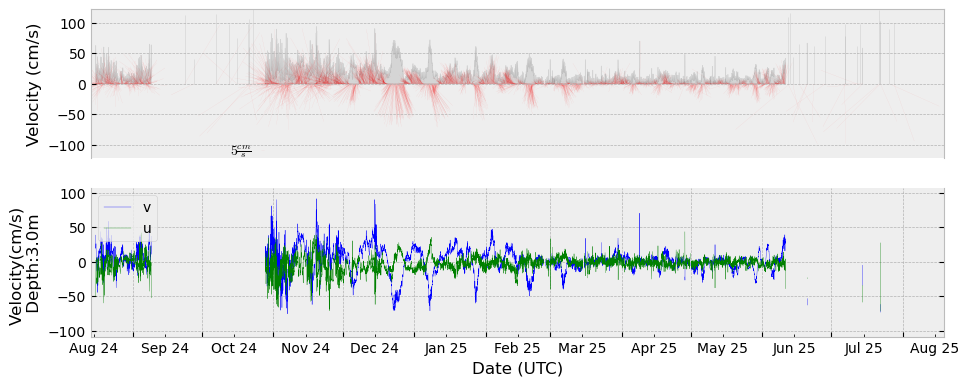

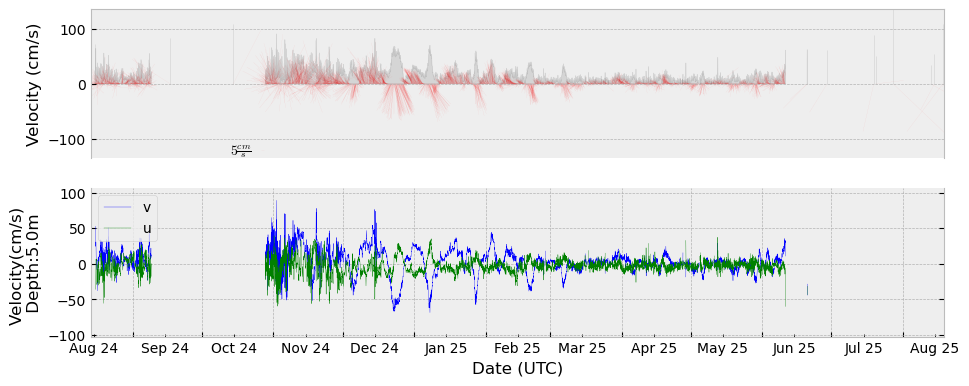

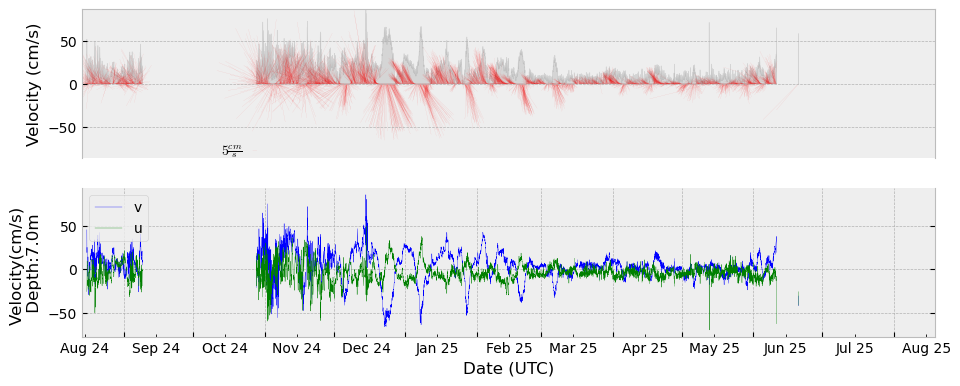

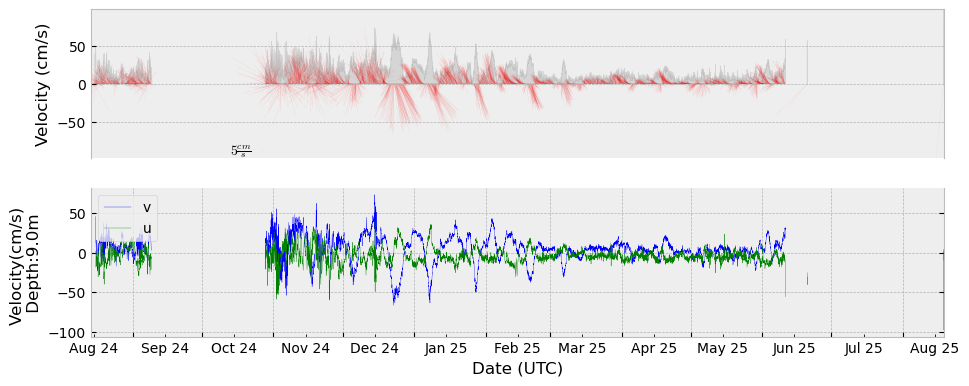

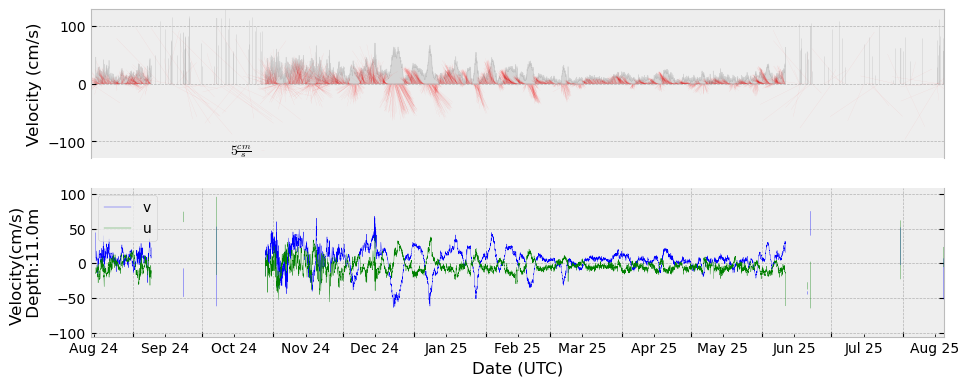

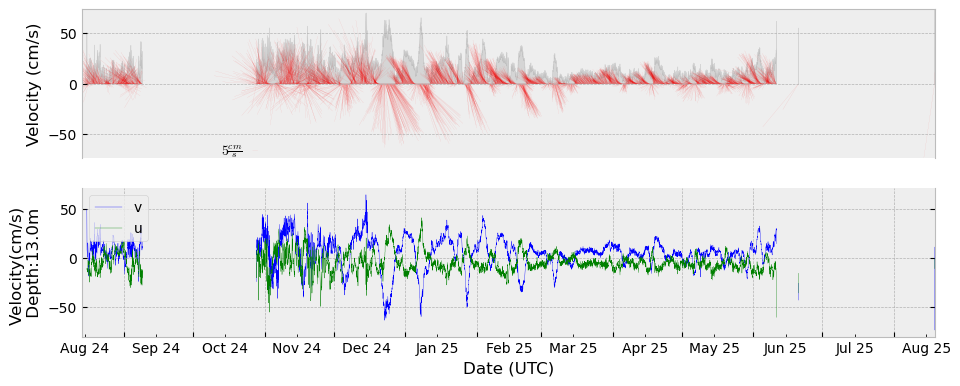

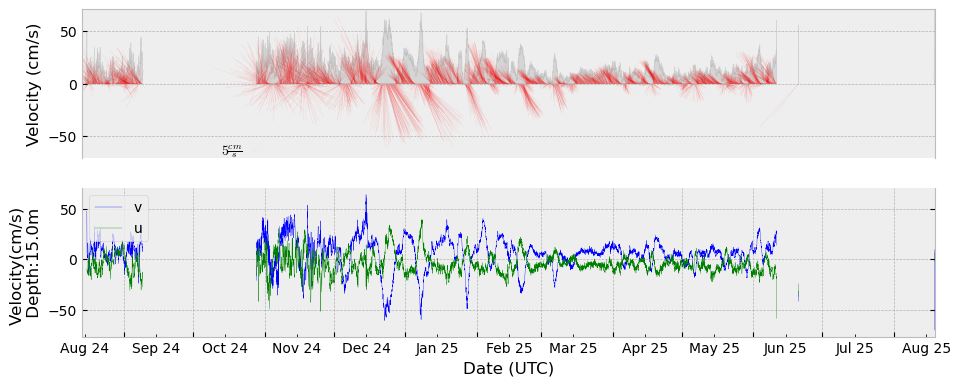

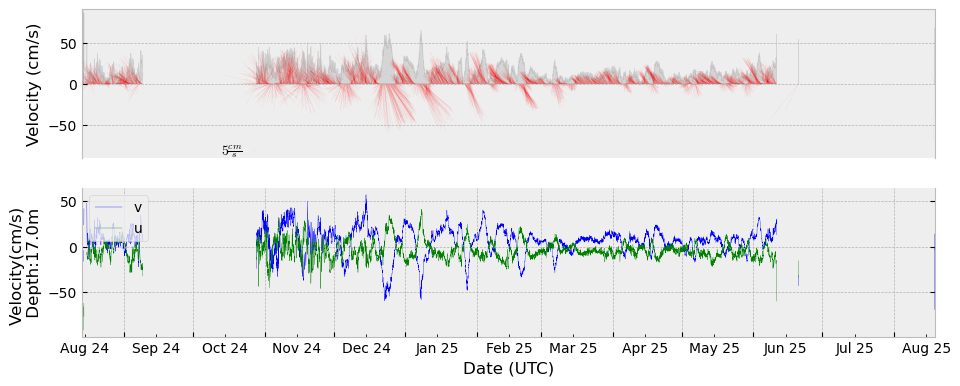

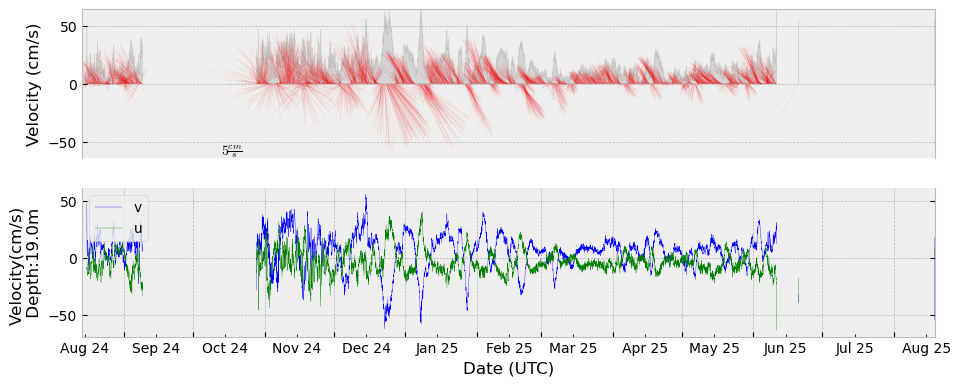

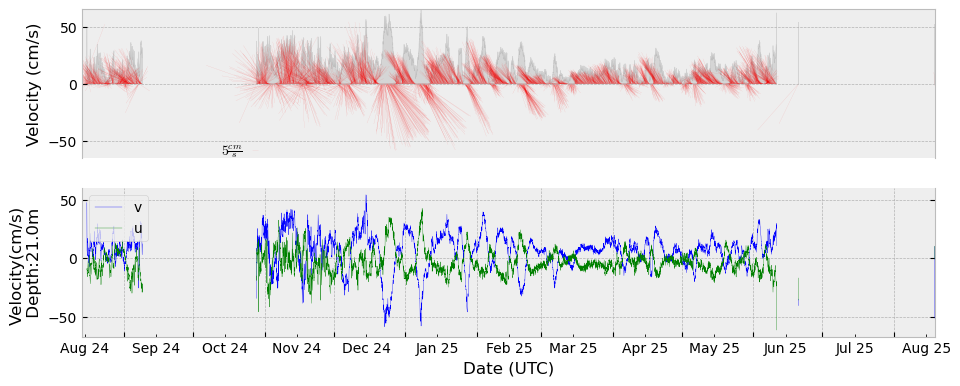

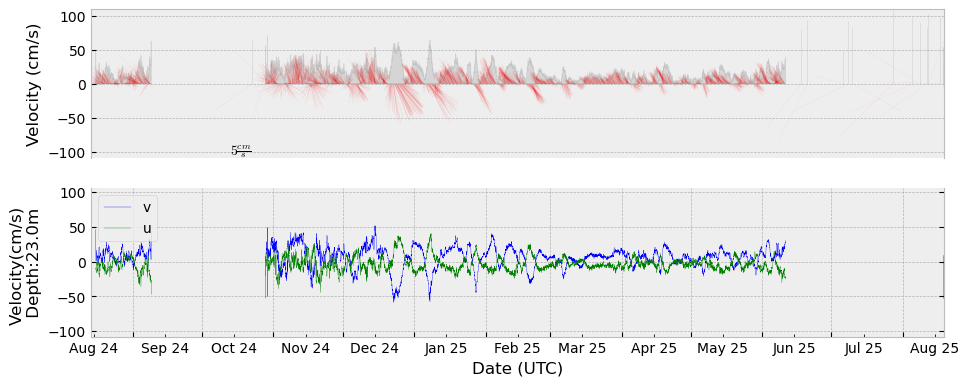

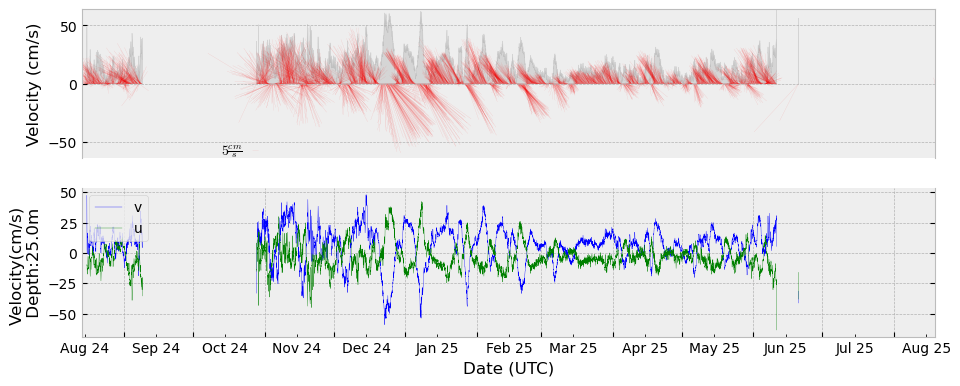

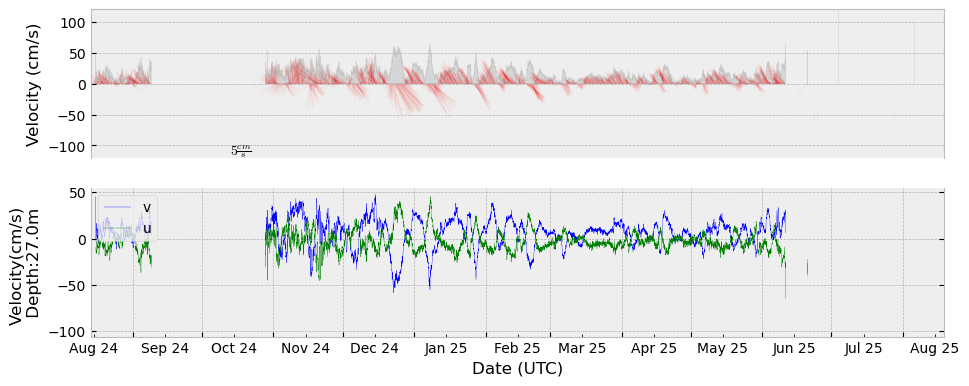

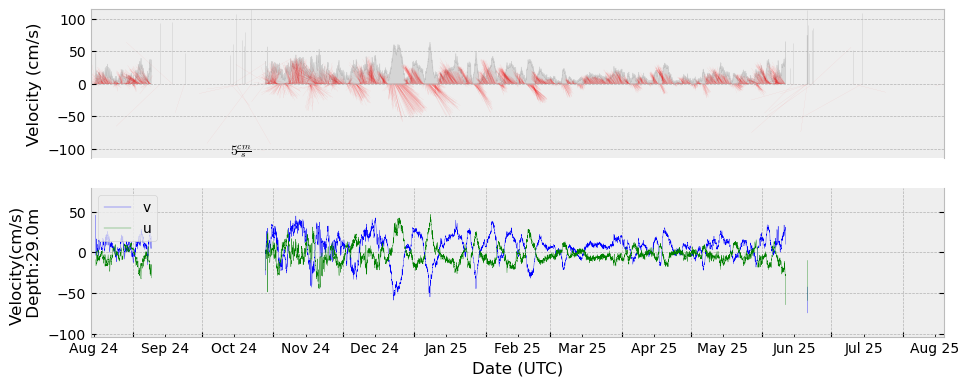

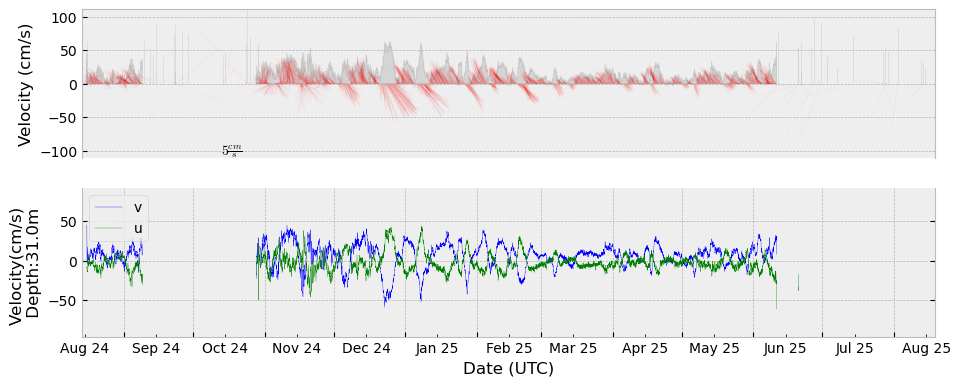

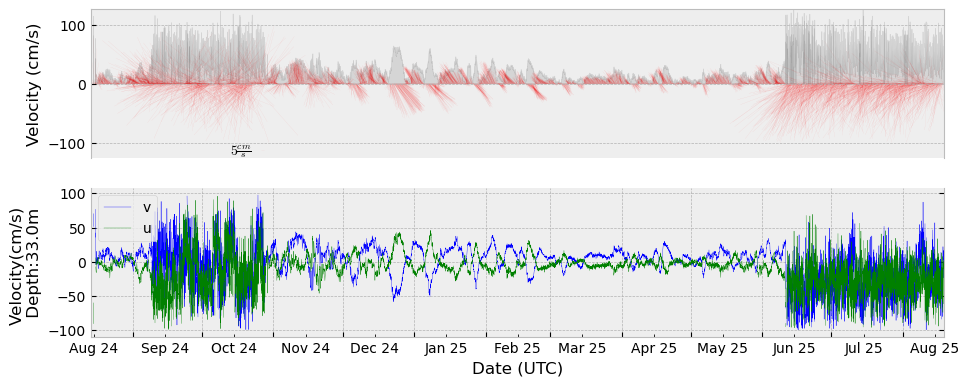

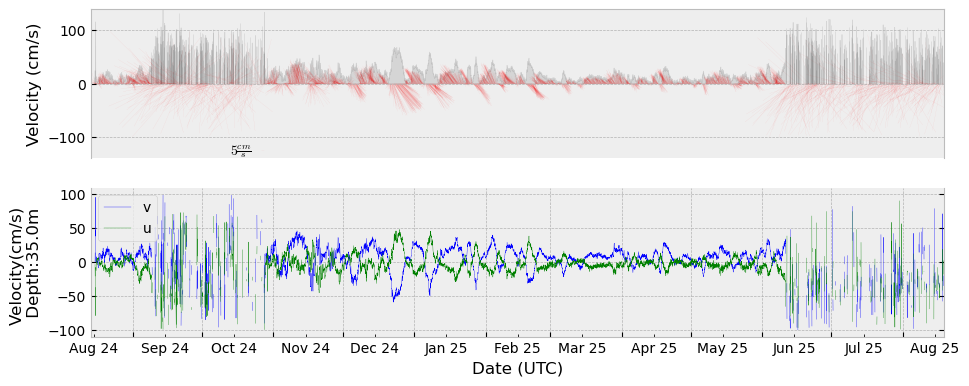

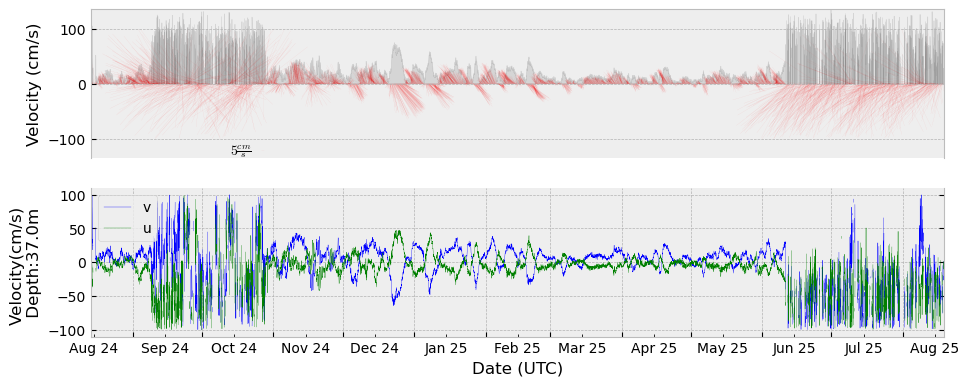

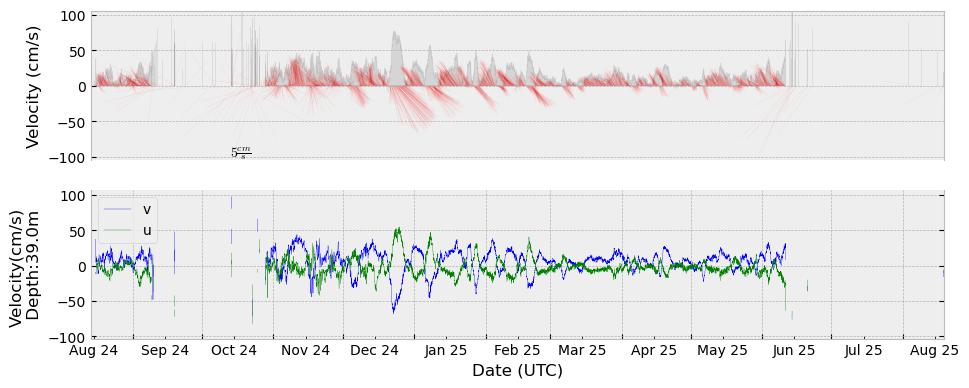

In [29]:
for i in range(0,len(xdf.depth),1):
    try:
        p1 = TimeSeriesStickPlot.Timeseries1dStickPlot()
        plt1, fig1 = p1.plot(timedata=xdf.time, 
                         udata=xdf.isel(depth=i,latitude=0,longitude=0).u_curr_comp, 
                         vdata=xdf.isel(depth=i,latitude=0,longitude=0).v_curr_comp,
                         rotate=0,
                         ylabel = f'Velocity(cm/s) \n {xdf.isel(depth=i).depth.values}m ')
        plt1.ylabel(f'Velocity(cm/s) \n Depth:{xdf.isel(depth=i).depth.values}m ')
    except:
        pass

In [30]:
xdf =xdf.where(np.abs(xdf.u_curr_comp) <=100,np.nan)
xdf =xdf.where(np.abs(xdf.v_curr_comp) <=100,np.nan)
xdf

<xarray.Dataset> Size: 11MB
Dimensions:          (latitude: 1, longitude: 1, time: 8855, depth: 20)
Coordinates:
  * time             (time) datetime64[ns] 71kB 2024-08-13T21:00:03 ... 2025-...
  * depth            (depth) float64 160B 1.0 3.0 5.0 7.0 ... 35.0 37.0 39.0
  * latitude         (latitude) float64 8B 67.91
  * longitude        (longitude) float64 8B -168.2
Data variables:
    u_curr_comp      (latitude, longitude, time, depth) float64 1MB nan ... -...
    v_curr_comp      (latitude, longitude, time, depth) float64 1MB nan ... -...
    w_curr_comp      (latitude, longitude, time, depth) float64 1MB nan ... 13.0
    w_curr_comp_err  (latitude, longitude, time, depth) float64 1MB nan ... nan
    agc1             (latitude, longitude, time, depth) float64 1MB nan ... 14.0
    agc2             (latitude, longitude, time, depth) float64 1MB nan ... 79.0
    agc3             (latitude, longitude, time, depth) float64 1MB nan ... 80.0
    agc4             (latitude, longitude, time, depth) float64 1MB nan ... 79.0
Attributes: (12/13)
    Latitude_DegMMddW:                      67 54.6 N
    Longitude_DegMMddN:                     168 10.86 W
    MooringID:                              24CKP-12A
    platform_deployment_date:               2024-08-13T20:50:00Z
    platform_deployment_cruise_name:        SKQ202412S
    platform_recovery_date:                 2025-08-18T16:58:01Z
    ...                                     ...
    platform_deployment_recovery_comments:  add two ss shackles and isolator ...
    WaterDepth:                             58.0
    date_created:                           2025-11-24T15:48:34Z
    date_modified:                          
    QC_indicator:                           unknown
    history:                                Trimmed to deployment.  removed U...

In [31]:
# xdf['history'] = xdf.history + 'QC of high u/v values'

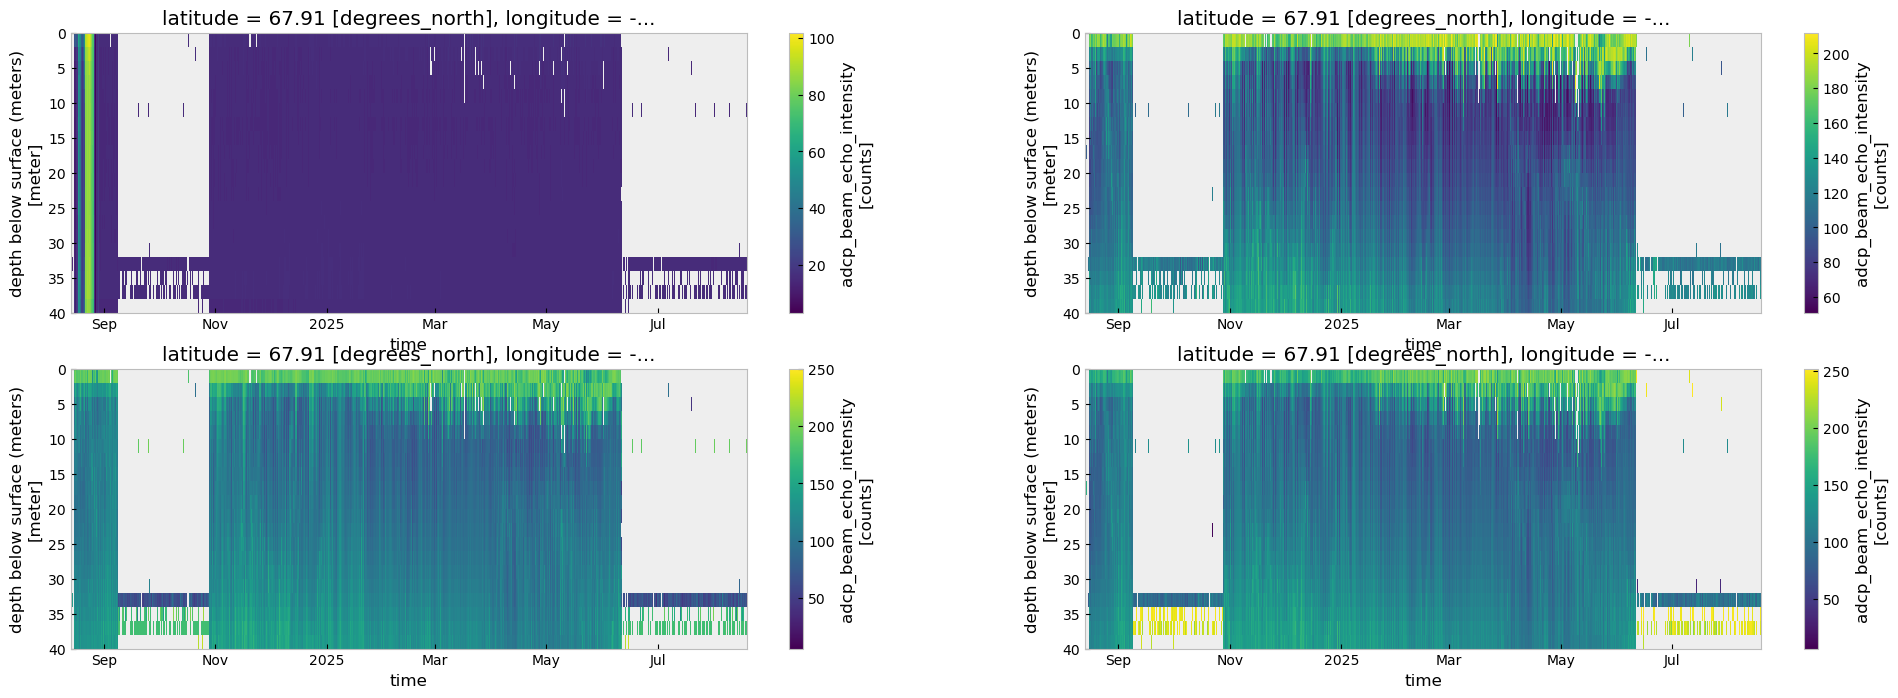

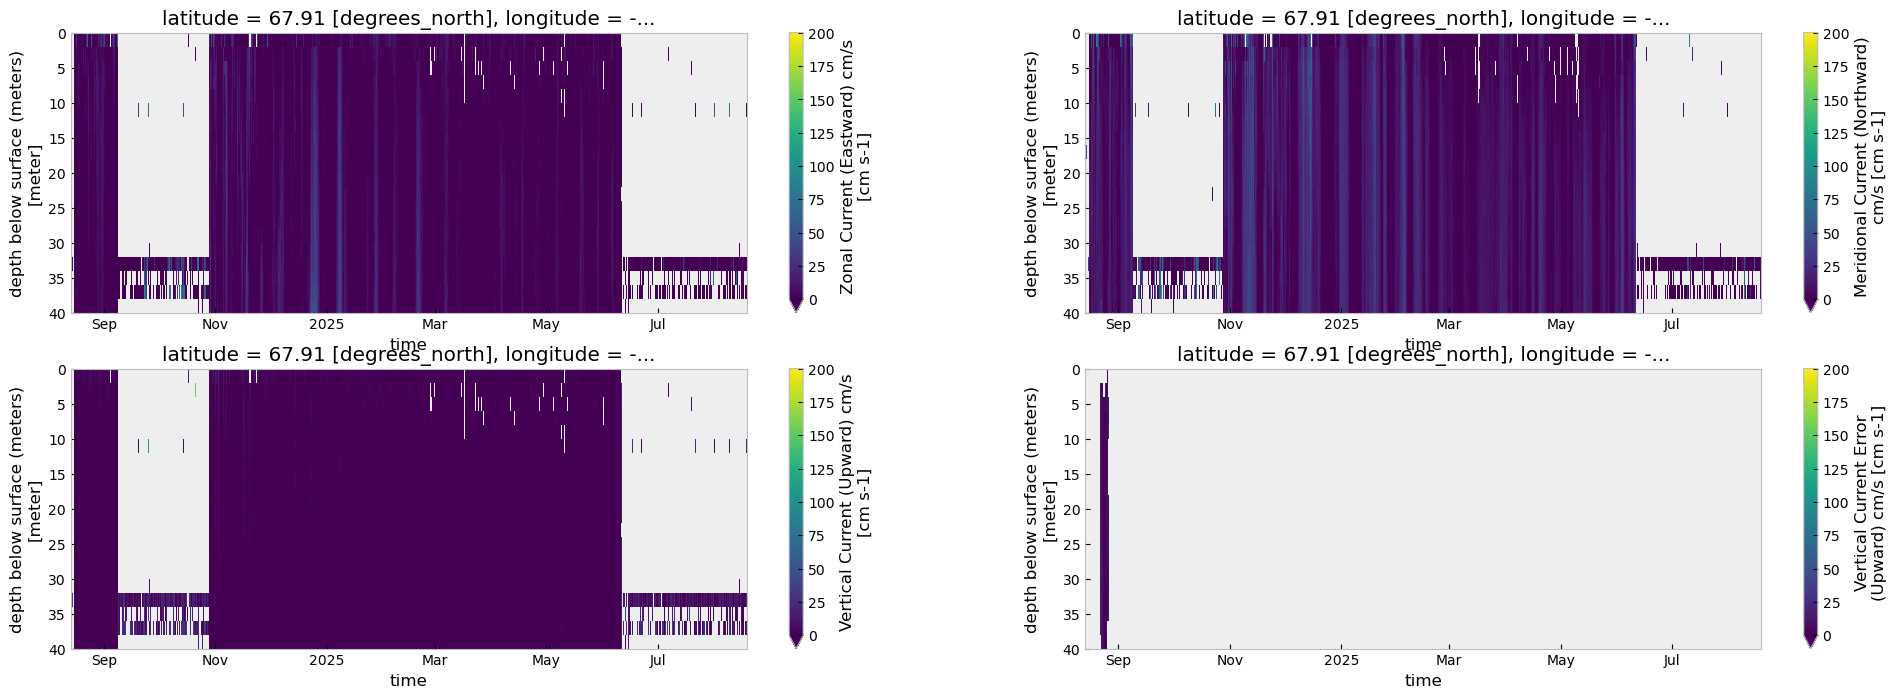

In [32]:
#optional plotting

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24,8))
try:
    xdf['agc1'].T.plot(ax=axes[0,0], yincrease=False)
    xdf['agc2'].T.plot(ax=axes[0,1], yincrease=False)
    xdf['agc3'].T.plot(ax=axes[1,0], yincrease=False)
    xdf['agc4'].T.plot(ax=axes[1,1], yincrease=False)
except:
    pass

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24,8))
try:
    xdf['u_curr_comp'].T.plot(ax=axes[0,0],vmin=0, vmax=200, yincrease=False)
    xdf['v_curr_comp'].T.plot(ax=axes[0,1],vmin=0, vmax=200, yincrease=False)
    xdf['w_curr_comp'].T.plot(ax=axes[1,0],vmin=0, vmax=200, yincrease=False)
    xdf['w_curr_comp_err'].T.plot(ax=axes[1,1],vmin=0, vmax=200, yincrease=False)
except:
    pass

In [33]:
try:
    xdf.attrs['history'] = xdf.attrs['history']+'  removed U,V >100cm/s'
except:
    xdf.attrs['history'] = '  removed U,V >100cm/s'    

## Trim above surface (negative values)

In [34]:
ixdf = xdf.where(xdf.depth >=-0.).dropna(how='all',dim='depth')

In [35]:
ixdf.attrs['history'] = ixdf.attrs['history']+'  trimmed above surface'

In [36]:
ixdf.to_netcdf('24ckp12a_0043m.trimmed.nc')

In [37]:
xdf = xa.load_dataset('24ckp12a_0043m.trimmed.nc')

In [38]:
ixdf = xdf.interpolate_na(dim='time',max_gap='2H')

/Users/bell/mambaforge/envs/p312/lib/python3.12/site-packages/xarray/core/duck_array_ops.py:671: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  a = pd.to_timedelta(value)
/Users/bell/mambaforge/envs/p312/lib/python3.12/site-packages/xarray/core/duck_array_ops.py:671: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  a = pd.to_timedelta(value)
/Users/bell/mambaforge/envs/p312/lib/python3.12/site-packages/xarray/core/duck_array_ops.py:671: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  a = pd.to_timedelta(value)
/Users/bell/mambaforge/envs/p312/lib/python3.12/site-packages/xarray/core/duck_array_ops.py:671: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  a = pd.to_timedelta(value)
/Users/bell/mambaforge/envs/p312/lib/python3.12/site-packages/xarray/core/du

## Interpolate over singleton missing gaps linearly

In [39]:
ixdf.attrs['history'] = ixdf.attrs['history']+'  linearly interpolated 1hour gaps'

In [40]:
ixdf = ixdf.interpolate_na(dim='depth',max_gap=3)

In [41]:
ixdf.attrs['history'] = ixdf.attrs['history']+'  linearly interpolated 2 vertical bin'

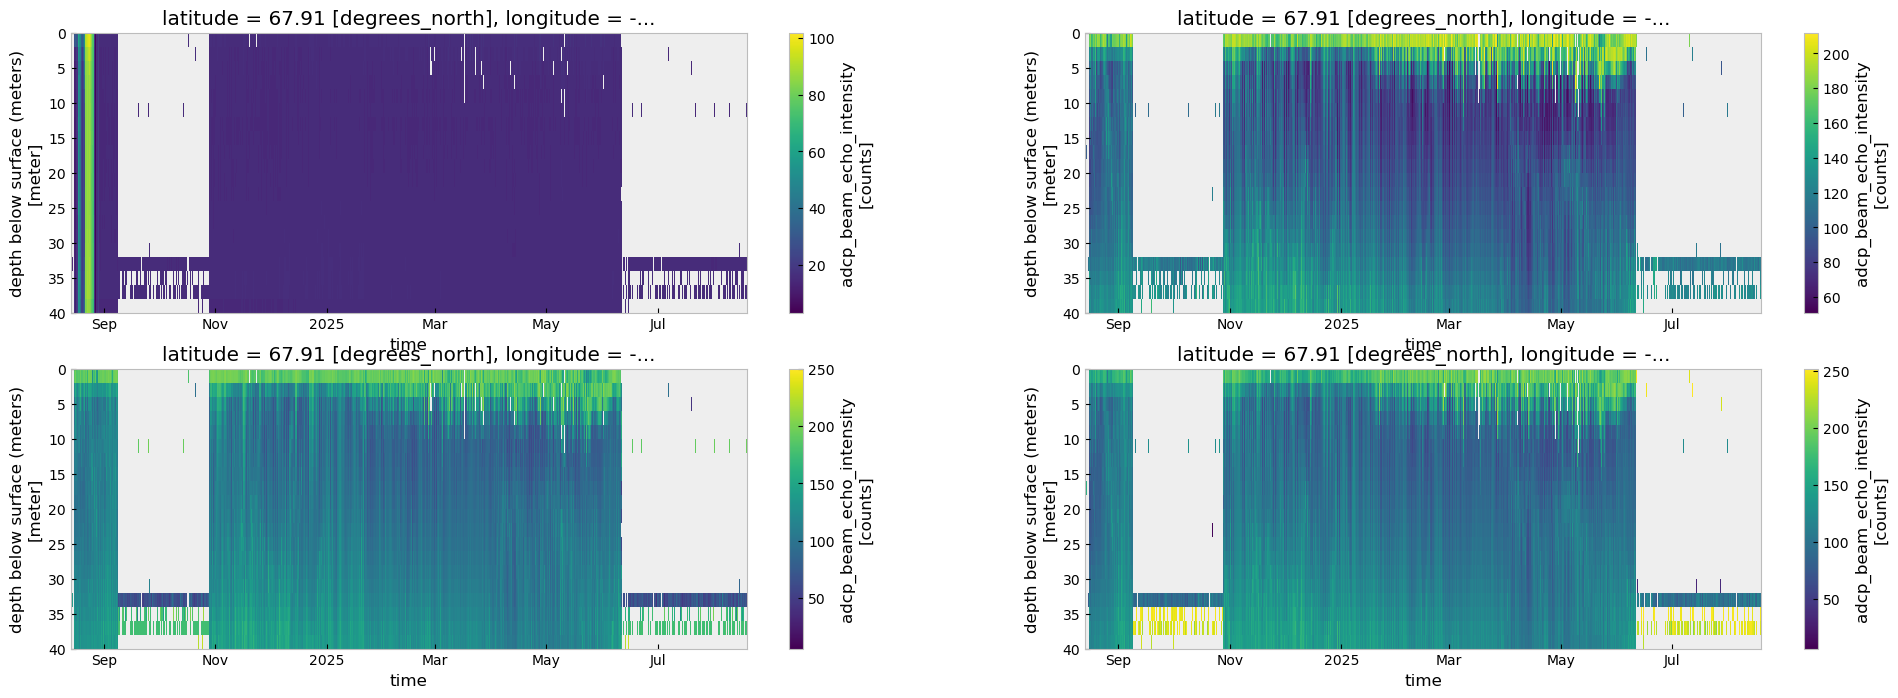

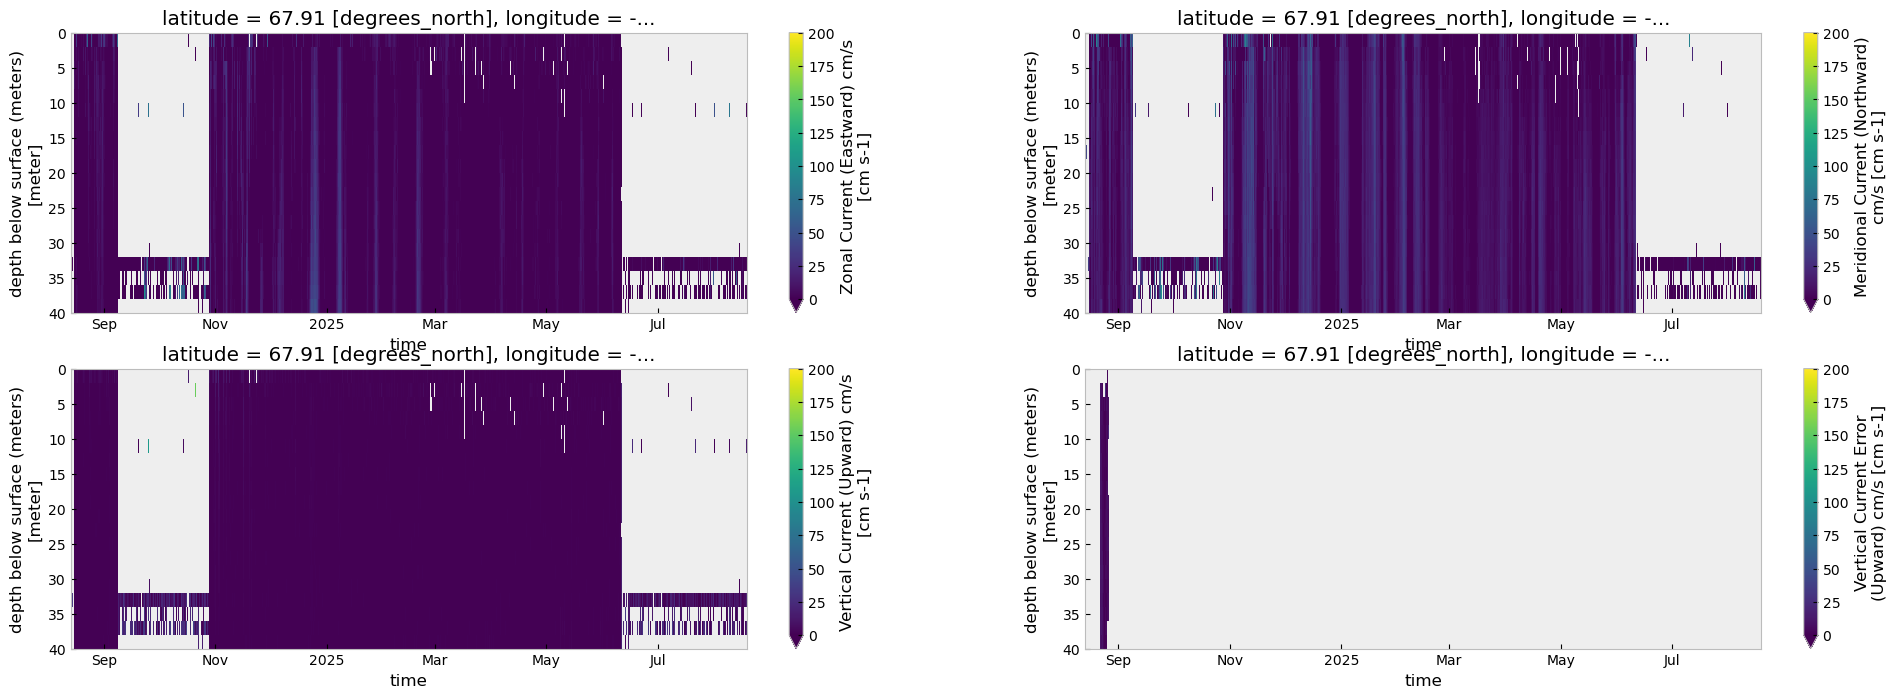

In [42]:

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24,8))
try:
    ixdf['agc1'].T.plot(ax=axes[0,0], yincrease=False)
    ixdf['agc2'].T.plot(ax=axes[0,1], yincrease=False)
    ixdf['agc3'].T.plot(ax=axes[1,0], yincrease=False)
    ixdf['agc4'].T.plot(ax=axes[1,1], yincrease=False)
except:
    pass

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24,8))
try:
    ixdf['u_curr_comp'].T.plot(ax=axes[0,0],vmin=0, vmax=200, yincrease=False)
    ixdf['v_curr_comp'].T.plot(ax=axes[0,1],vmin=0, vmax=200, yincrease=False)
    ixdf['w_curr_comp'].T.plot(ax=axes[1,0],vmin=0, vmax=200, yincrease=False)
    ixdf['w_curr_comp_err'].T.plot(ax=axes[1,1],vmin=0, vmax=200, yincrease=False)
except:
    pass

In [43]:
ixdf.to_netcdf('24ckp12a_0043m.filtered.nc')